In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('tensorflow version:',tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import PIL
print('PIL version:',PIL.__version__)
import os
import numpy as np
print('numpy version:',np.__version__)
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib version:',matplotlib.__version__)
import tensorflow_hub as hub
from keras import applications

import warnings
warnings.filterwarnings("ignore")

# Shared Input Layer
#from keras.utils import plot_model
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Lambda
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras import backend
#from google.colab import drive
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator

2023-07-02 16:57:16.359467: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1
tensorflow version: 2.9.2
PIL version: 7.1.2
numpy version: 1.21.6
matplotlib version: 3.2.2


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul  2 16:57:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     Off  | 00000000:3B:00.0  On |                  N/A |
| 30%   54C    P8    13W / 125W |    261MiB /  7979MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/complete Dataset' # data root path
classes_dir = ['BD Normal'] #total labels

val_ratio = 0.10
test_ratio = 0.10

for cls in classes_dir:
    os.makedirs(root_dir +'train_/' + cls)
    os.makedirs(root_dir +'val_/' + cls)
    os.makedirs(root_dir +'test_/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir +'/'+cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for cls in classes_dir:
       # Copy-pasting images
        for name in train_FileNames:
              shutil.copy(name, root_dir +'train_/' + cls)

        for name in val_FileNames:
              shutil.copy(name, root_dir +'val_/' + cls)

        for name in test_FileNames:
               shutil.copy(name, root_dir +'test_/' + cls)

Total images:  19360
Training:  15488
Validation:  1936
Testing:  1936


In [8]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/complete Dataset' # data root path
classes_dir = ['BD Parallel'] #total labels

val_ratio = 0.10
test_ratio = 0.10

for cls in classes_dir:
    os.makedirs(root_dir +'train_/' + cls)
    os.makedirs(root_dir +'val_/' + cls)
    os.makedirs(root_dir +'test_/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir +'/'+cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

for cls in classes_dir:
       # Copy-pasting images
        for name in train_FileNames:
              shutil.copy(name, root_dir +'train_/' + cls)

        for name in val_FileNames:
              shutil.copy(name, root_dir +'val_/' + cls)

        for name in test_FileNames:
               shutil.copy(name, root_dir +'test_/' + cls)

Total images:  16544
Training:  13235
Validation:  1654
Testing:  1655


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_dataset = train_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasettrain_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
         color_mode = 'rgb')

Found 28723 images belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
validation_dataset = validation_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasetval_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')


Found 3590 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
test_dataset = test_datagen.flow_from_directory(
     '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasettest_',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')

Found 3591 images belonging to 2 classes.


In [17]:
for image_batch, label_batch in train_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [18]:
class_names_train = train_dataset.class_indices
print(class_names_train)
class_names_validation = validation_dataset.class_indices
print(class_names_validation)

{'BD Normal': 0, 'BD Parallel': 1}
{'BD Normal': 0, 'BD Parallel': 1}


In [19]:
base_model1 = tf.keras.applications.MobileNet(weights='imagenet',
                                include_top=False, 
                                input_shape=(224, 224,3))

2023-07-02 17:00:25.326477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 17:00:26.192100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6389 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [20]:
base_model1.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [21]:
num = 2

model1= tf.keras.Sequential([
      base_model1,
     layers.Flatten(),
     #layers.Dense(512, activation='relu'),
     layers.Dropout(0.5),
  tf.keras.layers.Dense(num, activation = 'softmax' )
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 2)                 100354    
                                                                 
Total params: 3,329,218
Trainable params: 3,307,330
Non-trainable params: 21,888
_________________________________________________________________


In [22]:
optimizers = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model1.compile(
  optimizer=optimizers,
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
  metrics=['acc'])

history= model1.fit(train_dataset, 
                   validation_data = validation_dataset, 
                   epochs= 50)

Epoch 1/50


2023-07-02 17:00:36.118686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


898/898 [==============================] - 197s 212ms/step - loss: 0.4349 - acc: 0.8735 - val_loss: 0.0749 - val_acc: 0.9738
Epoch 2/50
898/898 [==============================] - 187s 208ms/step - loss: 0.1245 - acc: 0.9646 - val_loss: 0.0367 - val_acc: 0.9877
Epoch 3/50
898/898 [==============================] - 184s 204ms/step - loss: 0.0808 - acc: 0.9765 - val_loss: 0.0355 - val_acc: 0.9894
Epoch 4/50
898/898 [==============================] - 183s 204ms/step - loss: 0.0541 - acc: 0.9845 - val_loss: 0.0240 - val_acc: 0.9936
Epoch 5/50
898/898 [==============================] - 184s 205ms/step - loss: 0.0397 - acc: 0.9875 - val_loss: 0.0209 - val_acc: 0.9947
Epoch 6/50
898/898 [==============================] - 185s 206ms/step - loss: 0.0348 - acc: 0.9891 - val_loss: 0.0250 - val_acc: 0.9933
Epoch 7/50
898/898 [==============================] - 185s 205ms/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0166 - val_acc: 0.9958
Epoch 8/50
898/898 [==============================] - 185s 

In [23]:
model1.save("MobileNET_1.h5")

In [24]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model("model_VGG16_unseen_final_mixed.h5")

# # Perform evaluation on a test dataset
# test_loss, test_accuracy = loaded_model.evaluate(test_dataset)

# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

# # Make predictions on new data
# #predictions = loaded_model.predict(new_data)


In [25]:
# #Make predictions on new data
# predictions = loaded_model.predict(test_dataset)


In [26]:
model1.evaluate(test_dataset)

113/113 [==============================] - 21s 184ms/step - loss: 0.0343 - acc: 0.9922


[0.0343228355050087, 0.9922027587890625]

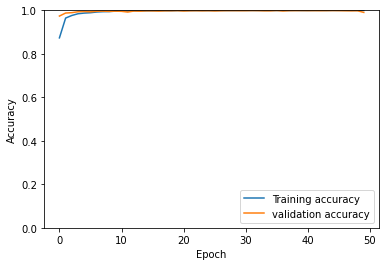

In [27]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('VGG16_accuracy.png',bbox_inches=None)
plt.show()

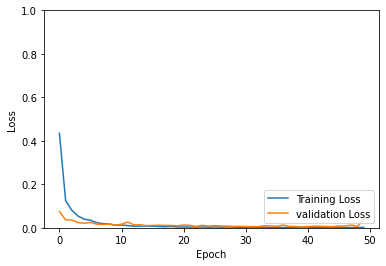

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('VGG16_loss.png',bbox_inches=None)
plt.show()

In [29]:
# print('Validate the model')
# final_result = loaded_model.evaluate(
#     validation_dataset,
#     #steps = 3590
# )

In [30]:
# from time import time

In [31]:
# t0 = time()
# #validation_dataset.reset()
# val_predict = loaded_model.predict(
#     validation_dataset,
# #     steps = 3590,
#     verbose = 1)
# print('Time taken to evaluate the model:',int(time()-t0),'seconds')

In [32]:
# validation_samples = val_predict.shape[0]
# print('Number of data points in validation set:',validation_samples)

In [33]:
# val_predicted_classes = np.argmax(val_predict, axis = 1)
# val_true_classes = validation_dataset.classes
# val_class_labels = list(validation_dataset.class_indices.keys())

In [34]:
import sklearn.metrics as metrics

In [35]:
# validation_report = metrics.classification_report(val_true_classes, val_predicted_classes, target_names=val_class_labels)
# print('The validation report is as follows:')
# print(validation_report)

In [36]:
# val_conf_matrix = tf.math.confusion_matrix(labels=val_true_classes, predictions=val_predicted_classes).numpy()
# print(val_conf_matrix)

In [37]:
 import seaborn as sns

In [38]:
# figure1 = plt.figure()
# val_conf_matrix = val_conf_matrix.astype('float') / val_conf_matrix.sum(axis=1)[:, np.newaxis]
# sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens)
# plt.tight_layout()
# plt.ylabel('True Label')
# plt.xlabel('Predicted label')
# plt.savefig('Validation data Confusion Matrix', dpi=250)

In [39]:
print('Testing the model')
final_result = model1.evaluate(
    test_dataset,
    #steps = 3591
)

Testing the model
113/113 [==============================] - 21s 184ms/step - loss: 0.0343 - acc: 0.9922


In [40]:
#test_dataset.reset()
predict_on_test_data = model1.predict(
    test_dataset,
    #steps = 3591,
    verbose = 1
)

113/113 [==============================] - 21s 183ms/step


In [41]:
print('Number of data points in test set:',predict_on_test_data.shape[0])

Number of data points in test set: 3591


In [42]:
predicted_classes = np.argmax(predict_on_test_data,axis=1)
predict_true_classes = test_dataset.classes
predict_class_labels = list(test_dataset.class_indices.keys())

In [43]:
test_report = metrics.classification_report(predict_true_classes, predicted_classes, target_names = predict_class_labels)
print(test_report)

              precision    recall  f1-score   support

   BD Normal       0.99      1.00      0.99      1936
 BD Parallel       1.00      0.98      0.99      1655

    accuracy                           0.99      3591
   macro avg       0.99      0.99      0.99      3591
weighted avg       0.99      0.99      0.99      3591



In [44]:
test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes,predictions = predicted_classes).numpy()
print(test_confusion_matrix)

[[1935    1]
 [  27 1628]]


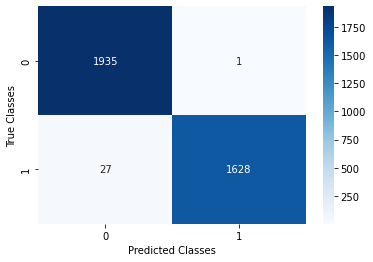

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes, predictions=predicted_classes).numpy()

sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

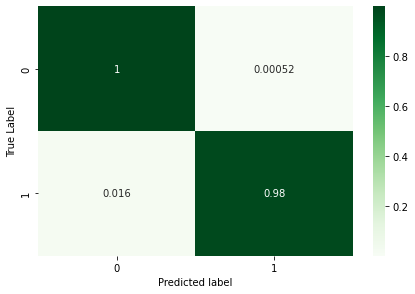

In [46]:
figure1 = plt.figure()
test_confusion_matrix = test_confusion_matrix.astype('float') / test_confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(test_confusion_matrix, annot = True, cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()